In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics

# Import COVID-19 pre-existing condition, sex and age data set
data = pd.read_csv('Sample of COVID-19 deaths by Sex, Age and Pre-existing condition.csv')

# Example of the data structure
data.head()

,Sex,Age,Pre-existing condition,Proportion of COVID-19 deaths (3dp %)
0,Males,0-44,No pre-existing condition,0.143
1,Males,0-44,Influenza and pneumonia,0.093
2,Males,0-44,Ischaemic heart diseases,0.010
3,Males,45-49,Influenza and pneumonia,0.125
4,Males,45-49,No pre-existing condition,0.125


In [2]:
# Info on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Sex                                    82 non-null     object 
 1   Age                                    82 non-null     object 
 2   Pre-existing condition                 82 non-null     object 
 3   Proportion of COVID-19 deaths (3dp %)  82 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.7+ KB


In [3]:
# Change categorical variables to numerical variables by encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex_n'] = le.fit_transform(data['Sex'])
data['Age_n'] = le.fit_transform(data['Age'])
data['Pre-existing condition_n'] = le.fit_transform(data['Pre-existing condition'])

# saves this dataset with the additional columns with numerical values called transformeddata.csv
data.to_csv(r'C:\Users\meksv\Documents\Business Analytics\transformeddata.csv')

In [4]:
# risk factors as input features
features = ['Sex_n','Age_n','Pre-existing condition_n']

In [5]:
# Proportion of COVID-19 deaths as output variable
output = ['Proportion of COVID-19 deaths (3dp %)']

In [6]:
x = data[features]

In [7]:
y = data[output]

In [8]:
#Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [9]:
# Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=0, max_depth=2)

In [10]:
# Fitting the model to the data
regressor = regressor.fit(x,y)

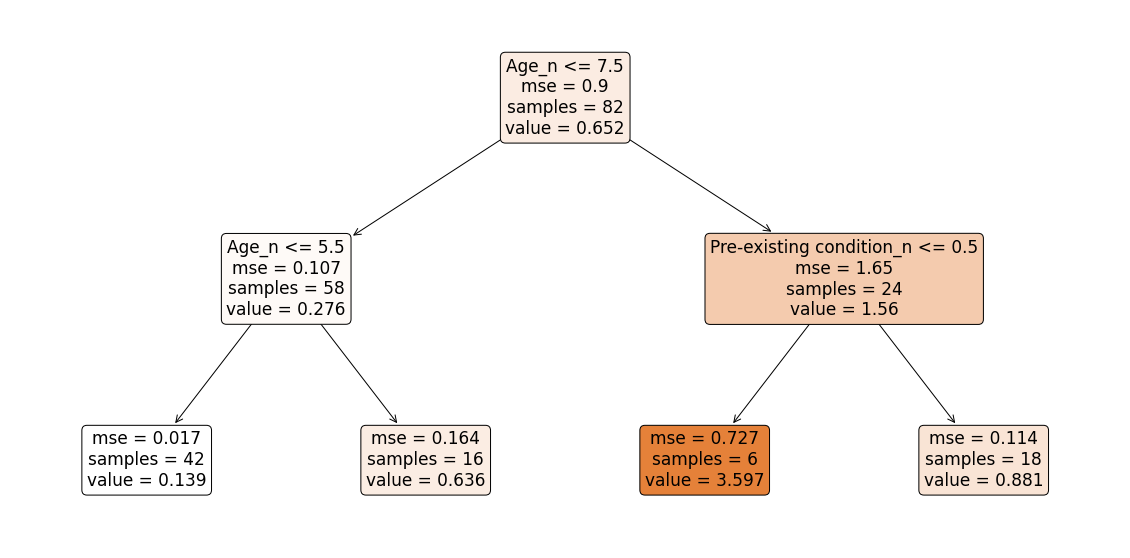

In [11]:
# Plotting the Regression Decision Tree Model
plt.figure(figsize=(20,10))
plot_tree(regressor,
          filled=True,
          rounded=True,
          feature_names = features)

# Saving the Regression Decision Tree Model
plt.savefig('RegressionDecisionTree.png')

In [12]:
# The prediction values
y_pred = regressor.predict(x_test)

In [13]:
# R-squared
score = regressor.score(x_test, y_test)
print (score)

0.9181197063545603


In [14]:
# RMSE
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error is: 0.3178236473658396


In [15]:
#Feature Relative Importance
prediction_importance = list(regressor.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]
[print('For feature {} Relative Importance is {}'.format(*rows)) for rows in sorted(input_importance)];

For feature Age_n Relative Importance is 0.481679350018839
For feature Pre-existing condition_n Relative Importance is 0.518320649981161
For feature Sex_n Relative Importance is 0.0


Random Forests

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Random Forest Regressor
RFregressor = RandomForestRegressor(n_estimators = 100, random_state=0, max_depth=2)

In [18]:
# Fitting the model to the data
RFregressor = RFregressor.fit(x,y)

<ipython-input-18-b4d2c64adeb8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor = RFregressor.fit(x,y)


In [19]:
# Storing predicted values
RFy_pred = RFregressor.predict(x_test)

In [20]:
# R-squared
score = RFregressor.score(x_test, y_test)
print (score)

0.940109188514826


In [21]:
# RMSE
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(y_test, RFy_pred)))

Root Mean Squared Error is: 0.27181699715093877


In [22]:
# Feature Relative Importance
prediction_importance = list(RFregressor.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]
[print('For feature {} Relative Importance is {}'.format(*rows)) for rows in sorted(input_importance)];

For feature Age_n Relative Importance is 0.5393807921206029
For feature Pre-existing condition_n Relative Importance is 0.457902656539852
For feature Sex_n Relative Importance is 0.002716551339545229
